In [35]:
import nidaqmx
import numpy as np
from nidaqmx.stream_readers import AnalogMultiChannelReader
from nidaqmx.constants import AcquisitionType 
import time
import matplotlib.pyplot as plt

In [36]:
with nidaqmx.Task() as task:
#, nidaqmx.Task() as samp_clk_task:
    
    sampling_rate = 44100
    
    
    task.ai_channels.add_ai_voltage_chan("cDAQ1Mod1/ai0")
    #samp_clk_task.ai_channels.add_ai_chan('cDAQ1Mod1/ai0')
    
    task.timing.cfg_samp_clk_timing(sampling_rate)

    

    hibs = task.read()

In [28]:
print(hibs)
print(type(hibs))

-0.183943592052
<class 'float'>


In [20]:
with nidaqmx.Task() as task:
#, nidaqmx.Task() as samp_clk_task:
    
    sampling_rate = 10000
    
    data = np.empty([1,10000])
    reader = AnalogMultiChannelReader(task.in_stream)
    
    task.ai_channels.add_ai_voltage_chan("cDAQ1Mod1/ai0")
    #samp_clk_task.ai_channels.add_ai_chan('cDAQ1Mod1/ai0')
    
    task.timing.cfg_samp_clk_timing(sampling_rate, source="",
                                     sample_mode=AcquisitionType.CONTINUOUS, samps_per_chan=10000)
    reader = AnalogMultiChannelReader(task.in_stream)
    
   

    hibs = reader.read_many_sample(data,number_of_samples_per_channel = 10000)#
        

In [37]:
sampling_rate_write = 10
sampling_rate_read = 10000

task_read = nidaqmx.Task()
task_read.ai_channels.add_ai_voltage_chan("cDAQ1Mod1/ai0")
task_read.timing.cfg_samp_clk_timing(sampling_rate_read)


task_write = nidaqmx.Task()
task_write.ao_channels.add_ao_voltage_chan("cDAQ1Mod2/ao0",'output', -2, 2)
task_write.timing.cfg_samp_clk_timing(sampling_rate_write)

start=0; stop=20; increment=1

sample_rate = 44100 
sampling_interval = 1/sample_rate

freq = 100
omega = 2*np.pi*freq
amplitude = 1
t = np.arange(0, 4, sampling_interval)
data = amplitude*np.sin(omega*t)

value = []

for k in range(start, stop, increment):
    #data = 1.5*np.ones(2)

    task_write.write(number_of_samples_per_channel = 1, data[k])
    task_write.start()
    

    #time.sleep(1/sampling_rate)
    task_read.start()
    value[k] = task_read.read(number_of_samples_per_channel = 1)
    
    print(value[k])
    task_write.wait_until_done()
    task_read.wait_until_done()
    
    task_read.stop()
    task_write.stop() 

  
#task_write.stop()
task_write.close()
#task_read.stop()
task_read.close()

SyntaxError: positional argument follows keyword argument (3588009285.py, line 29)

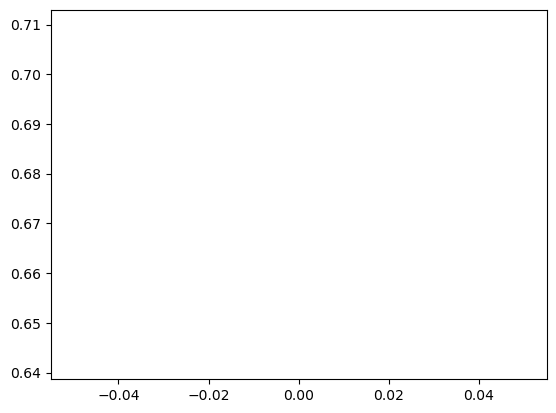

In [18]:
plt.plot(value)

In [6]:
import nidaqmx.system

system = nidaqmx.system.System.local()
print(system.driver_version)
# DriverVersion(major_version=17L, minor_version=1L, update_version=0L)

for device in system.devices:
    print(device)

DriverVersion(major_version=22, minor_version=5, update_version=0)
Device(name=cDAQ1)
Device(name=cDAQ1Mod1)
Device(name=cDAQ1Mod2)


In [ ]:

import pprint
import nidaqmx

pp = pprint.PrettyPrinter(indent=4)

with nidaqmx.Task() as task:
    task.ai_channels.add_ai_voltage_chan("cDAQ1Mod1/ai0")
    task.timing.cfg_samp_clk_timing(sampling_rate)
    in_stream = task.in_stream

    print('1 Channel 1 Sample Read Raw: ')
    data = in_stream.read(number_of_samples_per_channel=1)
    pp.pprint(data)

    print('1 Channel N Samples Read Raw: ')
    data = in_stream.read(number_of_samples_per_channel=8)
    pp.pprint(data)
    
    task.wait_until_done()
    task.stop()

    task.ai_channels.add_ai_voltage_chan("cDAQ1Mod1/ai1:3")
    

    print('N Channel 1 Sample Read Raw: ')
    data = in_stream.read(number_of_samples_per_channel=1)
    pp.pprint(data)

    print('N Channel N Samples Read Raw: ')
    data = in_stream.read(number_of_samples_per_channel=8)
    pp.pprint(data)
    
    task.wait_until_done()
    task.stop()